In [1]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats
%matplotlib inline

### Разделение категориальных значений

enc = preprocessing.OneHotEncoder

- преобразует категориальные признаки в числовые

размножает признаки в 1 и 0 

#### OneHotEncoder

In [3]:
churn_ds = pd.read_csv('telecom_churn.csv')

In [5]:
churn_ds['State'].nunique()

51

In [8]:
churn_ds.values[:, [0]]  # хак для преоразования в матрицу, так как OneHotEncoder принимает матрицу!!!

array([['KS'],
       ['OH'],
       ['NJ'],
       ...,
       ['RI'],
       ['CT'],
       ['TN']], dtype=object)

In [9]:
enc_2 = preprocessing.OneHotEncoder()
enc_2.fit(churn_ds.values[:, [0]])

encoded_ds = enc_2.transform(churn_ds.values[:, [0]]).toarray()

In [12]:
churn_ds_ext = pd.concat((churn_ds, pd.DataFrame(encoded_ds, columns=enc_2.get_feature_names())), axis=1)
print(churn_ds.shape)
print(churn_ds_ext.shape)

(3333, 20)
(3333, 71)


In [13]:
churn_ds_ext.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,x0_SD,x0_TN,x0_TX,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


get_dumies - аналог в панде функции OneHotEncoder
но она не контролирует fit и transform, то есть нужно будет контролировать руками train и test

In [15]:
pd.get_dummies(churn_ds, columns=['State','Area code']).head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


#### Binarizer


Непрерывный признак делится на группу, например возраст делится на возрастные группы - дети, взрослые и т д 

Это может быть полезно для упрощения признаков

In [18]:
# для примера преобразуем кол-во голосовых мейлов, потому что в основном их никто не подключает, 
# а у очень малой группы есть разное кол-во мейлов, поэтому проще их преобразовать в признак Number vmail messages_bin

binarizer = preprocessing.Binarizer(threshold=3).fit(churn_ds.values[:, [5]])
num_mess_ds = binarizer.transform(churn_ds.values[:, [5]])

In [20]:
pd.concat((
churn_ds, 
pd.DataFrame(num_mess_ds, columns=['Number vmail messages_bin'])
), axis=1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Number vmail messages_bin
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1.0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1.0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0.0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0.0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0.0
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,0.0
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,1.0
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,0.0
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,0.0
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False,1.0


#### Дискретизация
это почти как бинаризация, но разбивает не на 2, а на определенное число групп
таким образом приводим к равномерному распределению

мы задаем только кол-во бинов, а пороги он сам определяет

In [23]:
discretizer = preprocessing.KBinsDiscretizer(n_bins=[5], encode='ordinal').fit(churn_ds.values[:, [7]])
num_calls_ds = discretizer.transform(churn_ds.values[:, [7]])

In [25]:
pd.concat((
churn_ds, 
pd.DataFrame(num_calls_ds, columns=['Number calls diccret'])
), axis=1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Number calls diccret
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,3.0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,4.0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,3.0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0.0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,3.0
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,2.0
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,1.0
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,0.0
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,2.0
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False,1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


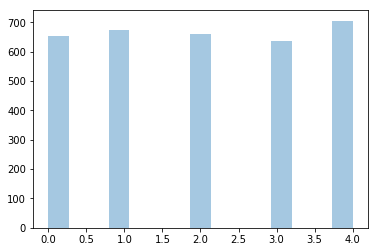

In [26]:
sns.distplot(num_calls_ds, kde=False)

### Геоданные

In [28]:
import reverse_geocoder as revgc

In [29]:
revgc.search((55.72, 37.61))

Loading formatted geocoded file...


[OrderedDict([('lat', '55.73333'),
              ('lon', '37.63333'),
              ('name', "Zamoskvorech'ye"),
              ('admin1', 'Moscow'),
              ('admin2', ''),
              ('cc', 'RU')])]

### Дата и время

используем синус и косинус для определения расстояния между часами, 23 часа близко к 1 часу

In [30]:
def make_harmonic_features(value, period=24):
    value = value * 2 * np.pi / period
    return np.cos(value), np.sin(value)

In [31]:
print(make_harmonic_features(2))

(0.8660254037844387, 0.49999999999999994)


In [32]:
print(make_harmonic_features(22))

(0.8660254037844384, -0.5000000000000004)


In [33]:
from scipy.spatial import distance

евклидово расстояние - это гипотенуза (кратчайшее расстояние)

манхеттенское расстояние - меряет навигатор по улицам (по отрезкам)

In [34]:
print(distance.euclidean(make_harmonic_features(23), make_harmonic_features(1)))

0.5176380902050424


In [35]:
print(distance.euclidean(make_harmonic_features(9), make_harmonic_features(11)))

0.5176380902050414


### Обработка изображений

In [38]:
import pytesseract
import requests
from PIL import Image
from io import BytesIO

In [39]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [40]:
link = 'http://ohscurrent.org/wp-content/uploads/2015/09/domus-01-google.jpg'
img = requests.get(link)
img = Image.open(BytesIO(img.content))
print(pytesseract.image_to_string(img))

Google


### Цвет пикселей

In [42]:
img = Image.open('domus-01-google.jpg')

In [43]:
rgb_img = img.convert('RGB')

In [46]:
rgb_img.getpixel((1, 1)) # координаты пикселя , белый

(255, 255, 255)

In [45]:
rgb_img.getpixel((100, 100))

(56, 131, 250)

In [47]:
rgb_img.size

(1280, 620)

In [48]:
def get_img(path):
    img = Image.open(path)
    rgb_img= img.convert('RGB')
    return rgb_img

In [49]:
rgb_img1 = get_img('pic1.jpg')

In [50]:
rgb_img2 = get_img('pic2.jpg')

In [51]:
print(rgb_img1.size)
print(rgb_img2.size)

(1280, 854)
(1280, 853)


In [52]:
pixels1=[]
pixels2=[]

for i in range(0, rgb_img2.size[0]-1):
    for j in range(0, rgb_img2.size[1]-1):
        try:
            pixels1.append(sum(rgb_img1.getpixel((i,j)))/3)
            pixels2.append(sum(rgb_img2.getpixel((i,j)))/3)
        except:
            print(i,j)
    

In [53]:
print(np.mean(pixels1))

137.34492848848808


In [54]:
print(np.mean(pixels2))

99.04466517635923


получили яркость картинки, чем больше rbg, тем ярче, использовать для циана.
создать признак яркости
это влияет на восприятие, яркие фото выгоднее смотрятся